In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.exceptions import NotFittedError
from scipy.stats import multivariate_normal

## 1. Прочитаем данные

In [4]:
data = pd.read_csv('owid-covid-data.csv')
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293538,ZWE,Africa,Zimbabwe,2023-03-03,264127.0,0.0,11.571,5668.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
293539,ZWE,Africa,Zimbabwe,2023-03-04,264127.0,0.0,4.571,5668.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
293540,ZWE,Africa,Zimbabwe,2023-03-05,264127.0,0.0,2.714,5668.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
293541,ZWE,Africa,Zimbabwe,2023-03-06,264127.0,0.0,0.000,5668.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [8]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
[x for x in data.location.unique() if 'rus' in x.lower()]

['Belarus', 'Cyprus', 'Northern Cyprus', 'Russia']

In [58]:
data_r = data[(data.location == 'Russia') & (data.date >= '2020-03-03')]
data_r = data_r[['date', 'new_cases', 'total_cases']] \
    .replace({'new_cases': 0}, 1).dropna().reset_index(drop=True)

data_r['day'] = data_r.index + 1
data_r['new_cases'] = data_r['new_cases'].apply(int)
data_r['total_cases'] = data_r['new_cases'].cumsum()
# data_r['total_cases'] = data_r['total_cases'].apply(int)
data_r

,date,new_cases,total_cases,day
0,2020-03-03,1,1,1
1,2020-03-04,1,2,2
2,2020-03-05,1,3,3
3,2020-03-06,1,4,4
4,2020-03-07,1,5,5
...,...,...,...,...
1095,2023-03-03,14516,22314529,1096
1096,2023-03-04,14049,22328578,1097
1097,2023-03-05,13559,22342137,1098
1098,2023-03-06,11163,22353300,1099


In [59]:
train = data_r.head(50)
test = data_r.tail(-50)

## 2.a

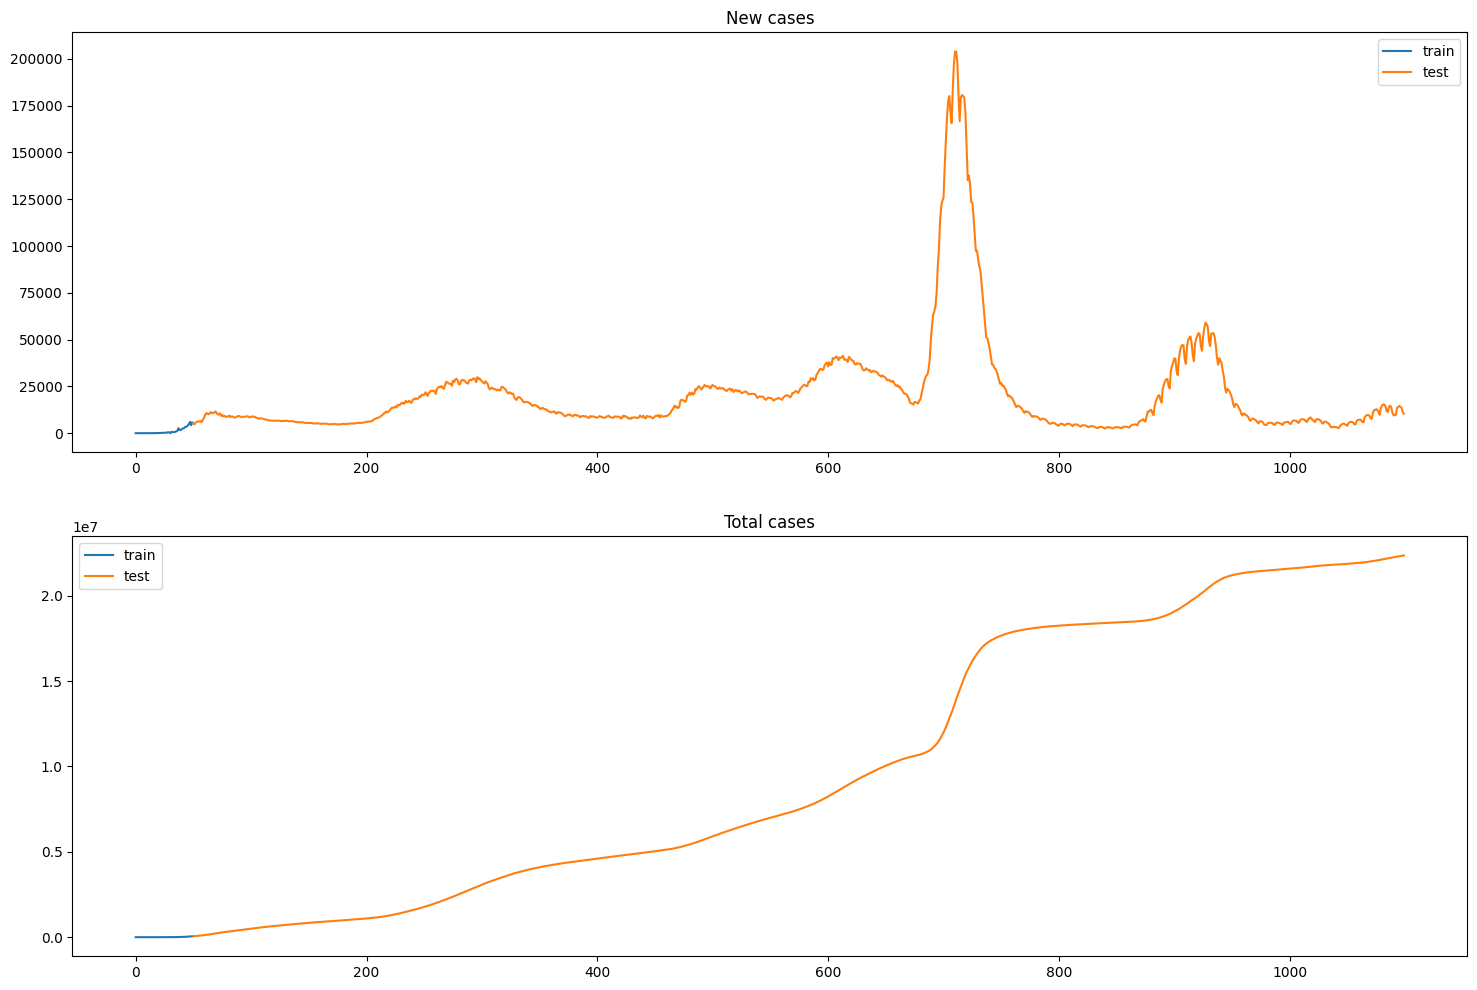

In [69]:
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

ax = axes[0]
ax.set_title('New cases')
ax.plot(train['new_cases'], label='train')
ax.plot(test['new_cases'], label='test')
ax.legend()

ax = axes[1]
ax.set_title('Total cases')
ax.plot(train['total_cases'], label='train')
ax.plot(test['total_cases'], label='test')
ax.legend()

plt.show()

In [64]:
model = LinearRegression()
model.fit(train[['day']], np.log(train['new_cases']))

print(f'ln(new_cases) = a * (new_cases) + b. a={model.coef_[0]}; b={model.intercept_}')

ln(new_cases) = a * (new_cases) + b. a=0.19995828847940364; b=-0.6059353054631389


In [65]:
class BayesianLinearRegression:
    def __init__(self, mu0, sigma0):
        self.mu0 = mu0
        self.sigma0 = sigma0
        self.mu = mu0
        self.sigma = sigma0
        self.is_fitted = False
    
    def __repr__(self):
        return f'{self.__class__.__name__}(mu0 = {self.mu0}, sigma0 = {self.sigma0})'
    
    def estimate_noise(self, X, y):
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        noise = np.var(y - X @ w)
        return noise
    
    def bayesian_update(self, X, y, noise):
        sigma = np.linalg.inv(self.sigma0) + X.T @ X / noise
        self.sigma = np.linalg.inv(sigma)
        
        mu = np.linalg.inv(self.sigma0) @ self.mu0 + X.T @ y / noise
        self.mu = self.sigma @ mu
    
    def fit(self, X, y):
        X = np.hstack((X, np.ones((len(X), 1))))
        noise = self.estimate_noise(X, y)
        self.bayesian_update(X, y, noise)
        self.is_fitted = True
        return self
    
    def predict(self, X):
        if not self.is_fitted:
            raise NotFittedError
        X = np.hstack((X, np.ones((len(X), 1))))
        return X @ self.mu
    
    def sample_predict(self, X, n):
        if not self.is_fitted:
            raise Exception('Model is not fitted')
        X = np.hstack((X, np.ones((len(X), 1))))
        w_sample = np.random.multivariate_normal(self.mu, self.sigma, n)
        res = []
        for w in w_sample:
            res.append(X @ w)
        return np.array(res)

In [66]:
blr = BayesianLinearRegression(mu0 = np.zeros((2,)), sigma0 = 100 * np.eye(2))
blr.fit(train[['day']], np.log(train['new_cases']))

print(f'ln(new_cases) = a * (new_cases) + b. a={blr.mu[0]}; b={blr.mu[1]}')

ln(new_cases) = a * (new_cases) + b. a=0.19993606861659963; b=-0.6051895576427526


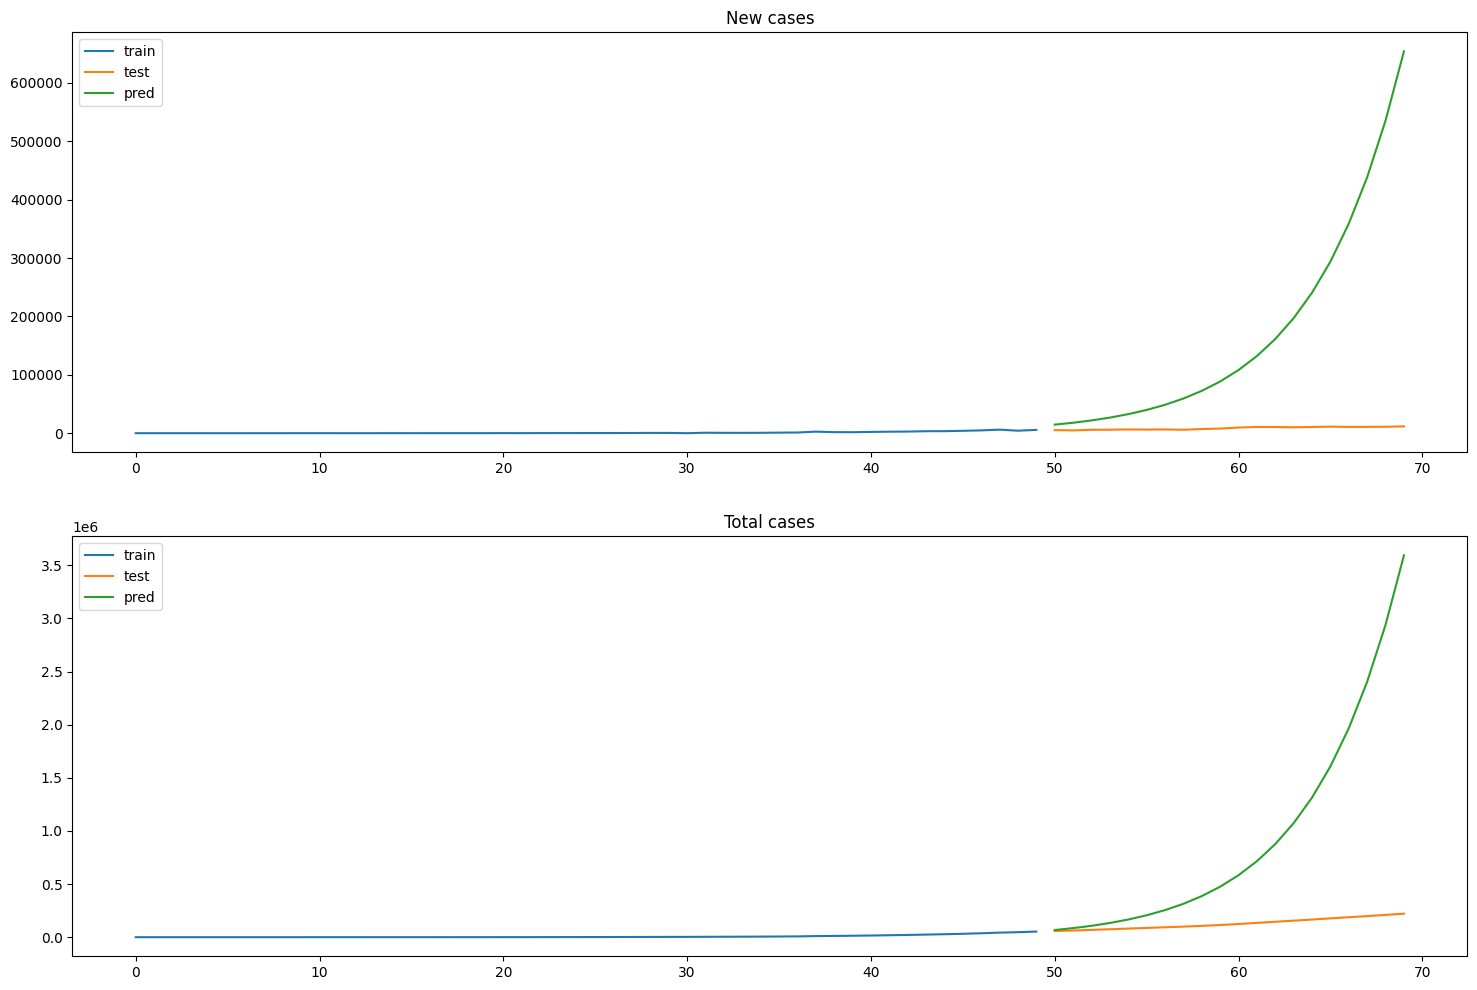

In [74]:
prediction_period = 20

predictions = test[['day']].copy()
predictions['new_cases'] = np.exp(blr.predict(predictions[['day']]))
predictions['total_cases'] = np.cumsum(predictions['new_cases']) + train['total_cases'].iloc[-1]

fig, axes = plt.subplots(2, 1, figsize=(18, 12))

ax = axes[0]
ax.set_title('New cases')
ax.plot(train['new_cases'], label='train')
ax.plot(test[:prediction_period]['new_cases'], label='test')
ax.plot(predictions[:prediction_period]['new_cases'], label='pred')
ax.legend()

ax = axes[1]
ax.set_title('Total cases')
ax.plot(train['total_cases'], label='train')
ax.plot(test[:prediction_period]['total_cases'], label='test')
ax.plot(predictions[:prediction_period]['total_cases'], label='pred')
ax.legend()


plt.show()

## 2.b

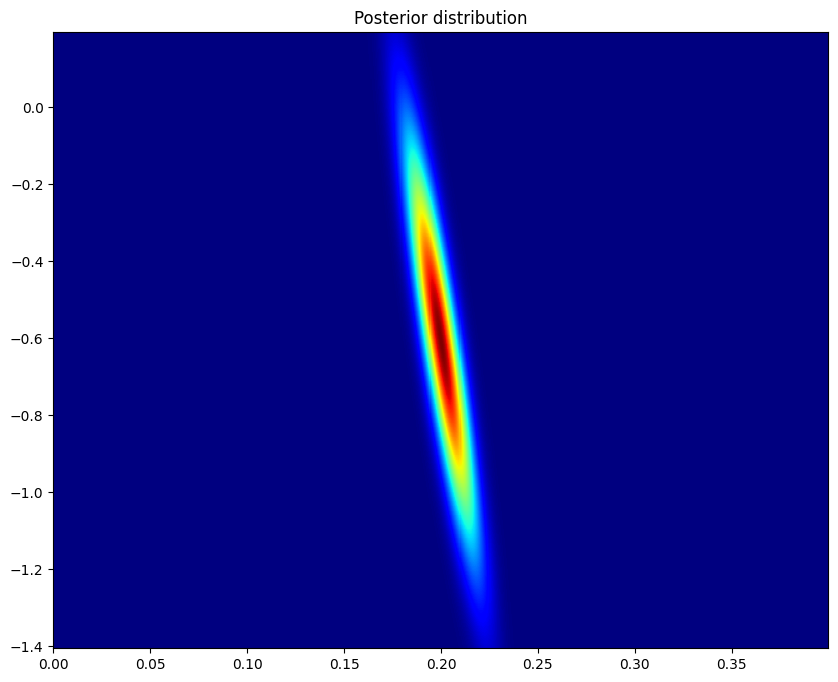

In [80]:
space_size = 750

x_lim = (blr.mu[0] - .2, blr.mu[0] + .2)
y_lim = (blr.mu[1] - .8, blr.mu[1] + .8)

X = np.linspace(*x_lim, space_size)
Y = np.linspace(*y_lim, space_size)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y


Z = multivariate_normal.pdf(pos, mean=blr.mu, cov=blr.sigma)

plt.figure(figsize=(10, 8))
plt.title('Posterior distribution')
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
plt.show()

## 2.c

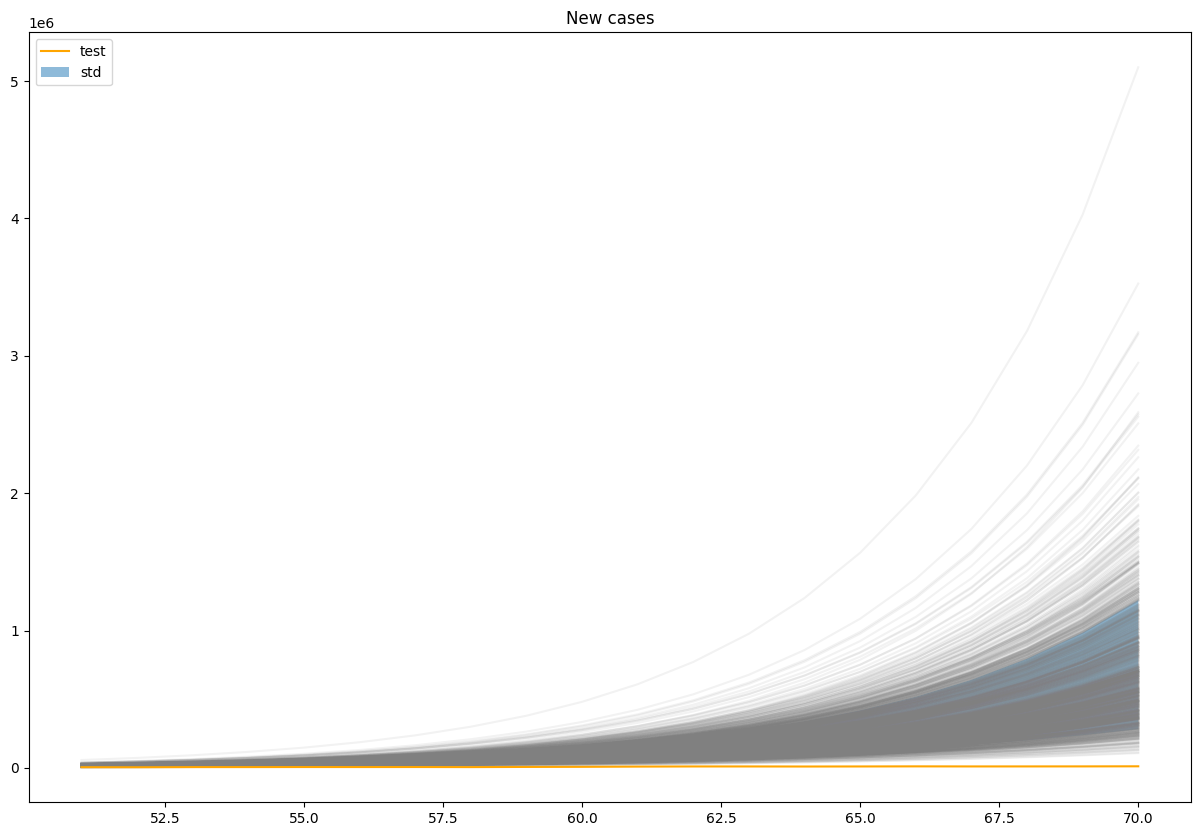

In [82]:
forecast = test[:prediction_period][['day']]
samples = np.exp(blr.sample_predict(forecast, 1000))


plt.figure(figsize=(15, 10))
plt.title("New cases")
for pred in samples:
    plt.plot(forecast, pred, alpha=.1, color='grey')
plt.plot(forecast, test[:prediction_period]['new_cases'].values, label='test', color='orange')

lb = np.mean(samples, axis=0) - np.std(samples, axis=0) 
ub = np.mean(samples, axis=0) + np.std(samples, axis=0)
plt.fill_between(forecast.squeeze(), lb, ub, alpha=.5, label='std')

plt.legend()
plt.show()

In [87]:
test[:20]

,date,new_cases,total_cases,day
50,2020-04-22,5236,58008,51
51,2020-04-23,4774,62782,52
52,2020-04-24,5849,68631,53
53,2020-04-25,5966,74597,54
54,2020-04-26,6361,80958,55
55,2020-04-27,6198,87156,56
56,2020-04-28,6411,93567,57
57,2020-04-29,5841,99408,58
58,2020-04-30,7099,106507,59
59,2020-05-01,7933,114440,60


In [91]:
print(f'1 мая: {int(predictions[predictions.day == 60].total_cases)}')
print(f'1 июня: {int(predictions[predictions.day == 90].total_cases)}')
print(f'1 сентября: {int(predictions[predictions.day == 180].total_cases)}')

1 мая: 475093
1 июня: 196672252
1 сентября: 12840278735184058
